## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings 
import random

## Data Wrangling

In [5]:
df = pd.read_csv("traffic.csv")

In [3]:
# smart_cities = ["Chennai", "Bangalore", "Thiruvananthapuram", "Mumbai"]

# # Generate random indices to select smart cities
# random_indices = [random.randint(0, 3) for _ in range(len(df))]

# # Assign smart cities randomly to the dataset
# df['SmartCity'] = [smart_cities[i] for i in random_indices]

In [4]:
# df = df.drop("Junction", axis=1)

In [6]:
df.head(5)

DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
df.shape


(48120, 4)

In [12]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.assign(
    Year=df['DateTime'].dt.year,
    Month=df['DateTime'].dt.month,
    Date_no=df['DateTime'].dt.day,
    Hour=df['DateTime'].dt.hour,
    Day=df['DateTime'].dt.strftime("%A")
)

In [13]:
df.head(2)

DateTime  Junction  Vehicles           ID  Year  Month  Date_no  \
0 2015-11-01 00:00:00         1        15  20151101001  2015     11        1   
1 2015-11-01 01:00:00         1        13  20151101011  2015     11        1   

   Hour     Day  
0     0  Sunday  
1     1  Sunday

## EDA

In [15]:
import plotly.express as px


### Line Plots of Vehicle Count by Time Features and Smart Cities

C:\Users\siris\AppData\Local\Temp\ipykernel_17176\2303761373.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction", palette=colors )
C:\Users\siris\AppData\Local\Temp\ipykernel_17176\2303761373.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction", palette=colors )
C:\Users\siris\AppData\Local\Temp\ipykernel_17176\2303761373.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction", palette=colors )
C:\Users\siris\AppData\Local\Temp\ipykernel_17176\2303761373.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction", palette=colors )
C:\Users\siris\AppData\Local\Tem

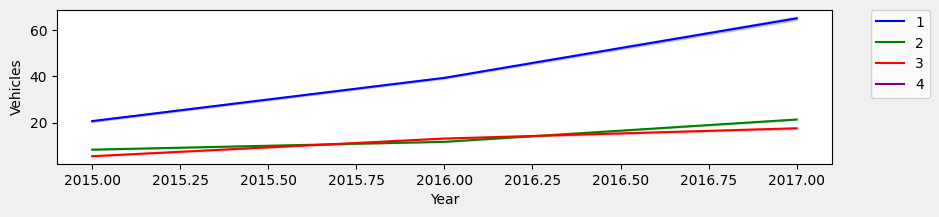

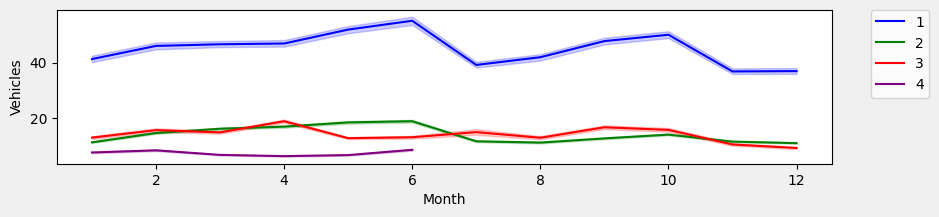

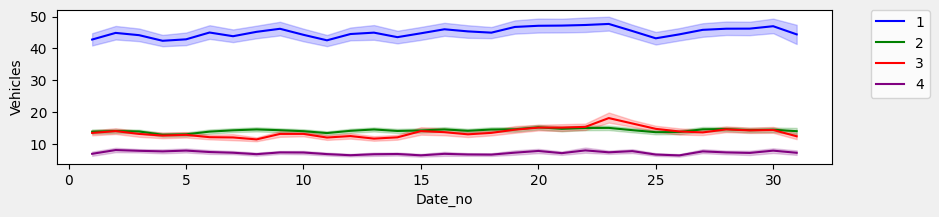

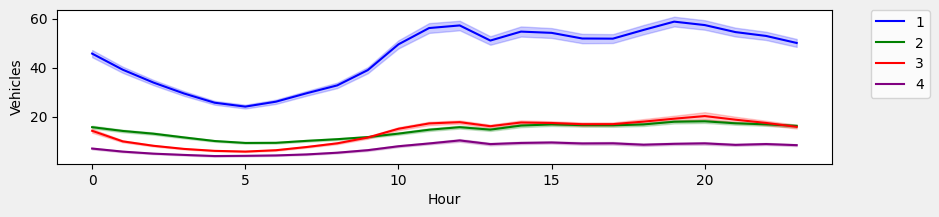

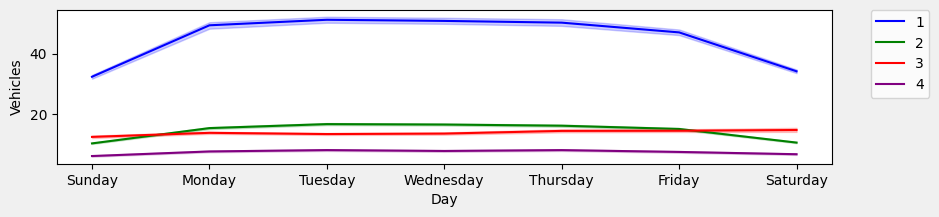

In [18]:
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]
colors = ["blue", "green", "red", "purple", "orange"]

for i in new_features:
    plt.figure(figsize=(10, 2),facecolor="#f0f0f0")
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction", palette=colors )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Visualizing Average Traffic Patterns by SmartCity

In [12]:

df_monthly = (
    df.groupby(["Junction", "Month"])
    .agg({"Vehicles": "mean"})
    .reset_index()
)

# Group by junction and day of week, average vehicles
df_day_week = (
    df.groupby(["Junction", "Day"])
    .agg({"Vehicles": "mean"})
    .reset_index()
)

# Group by junction and day of month, average vehicles
df_day_month = (
    df.groupby(["Junction", "Date_no"])
    .agg({"Vehicles": "mean"})
    .reset_index()
)

# Group by junction and hour, average vehicles
df_hourly = (
    df.groupby(["Junction", "Hour"])
    .agg({"Vehicles": "mean"})
    .reset_index()
)


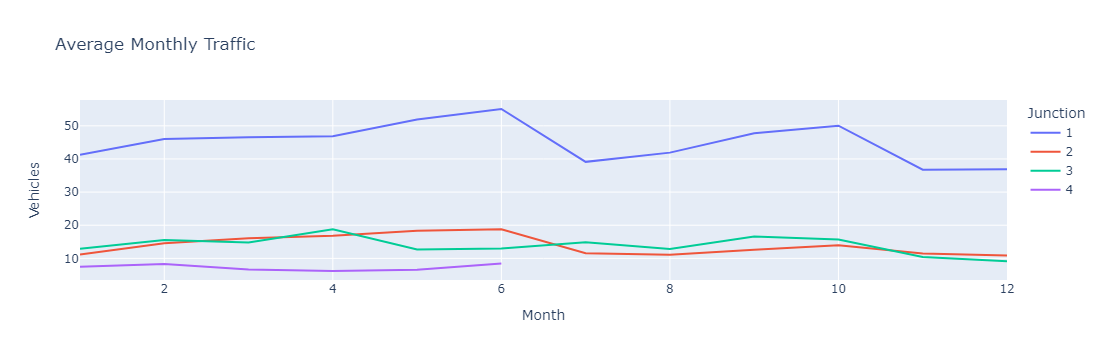

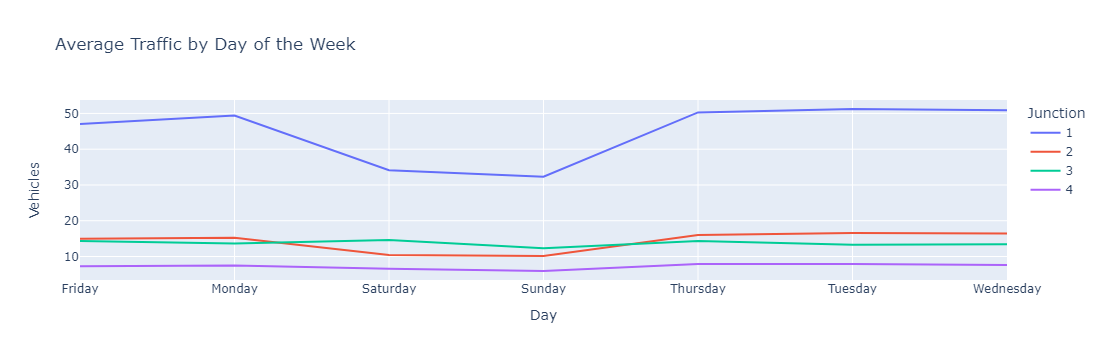

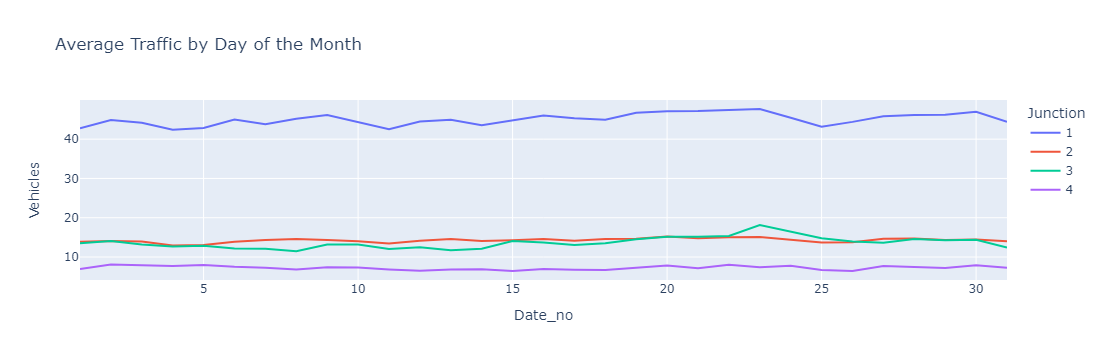

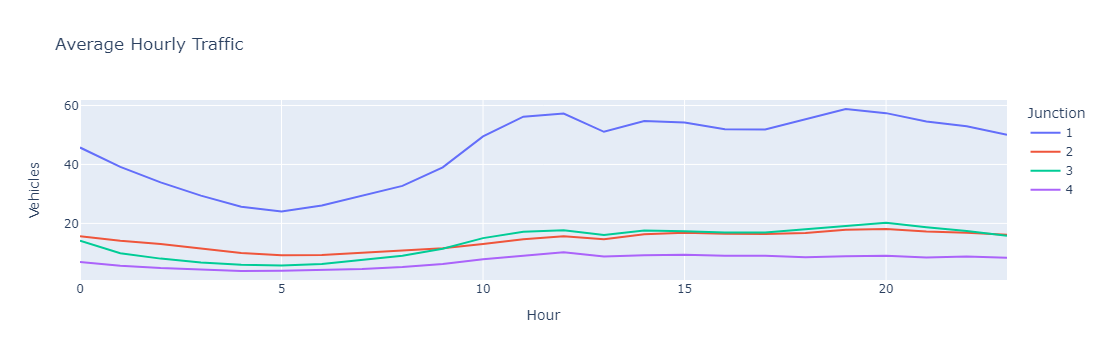

In [13]:
fig_monthly = px.line(df_monthly, x="Month", y="Vehicles", color="Junction", title="Average Monthly Traffic")
fig_day_week = px.line(df_day_week, x="Day", y="Vehicles", color="Junction", title="Average Traffic by Day of the Week")
fig_day_month = px.line(df_day_month, x="Date_no", y="Vehicles", color="Junction", title="Average Traffic by Day of the Month")
fig_hourly = px.line(df_hourly, x="Hour", y="Vehicles", color="Junction", title="Average Hourly Traffic")

# Display the plots
fig_monthly.show()
fig_day_week.show()
fig_day_month.show()
fig_hourly.show()

### Count of Traffic in Smart Cities Over the Years

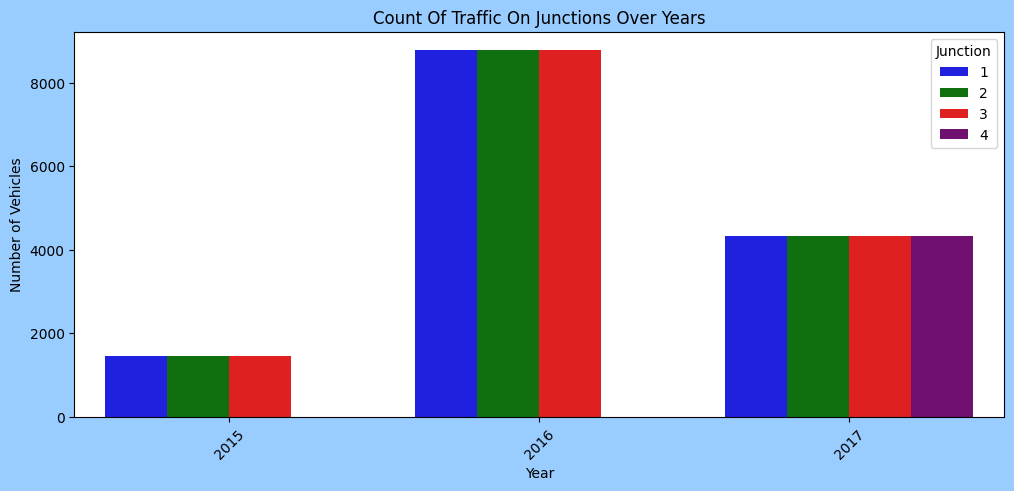

In [14]:
plt.figure(figsize=(12, 5), facecolor="#99ccff")
count = sns.countplot(data=df, x="Year", hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Year")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

### Creating a Correlation Heatmap for Numeric Columns



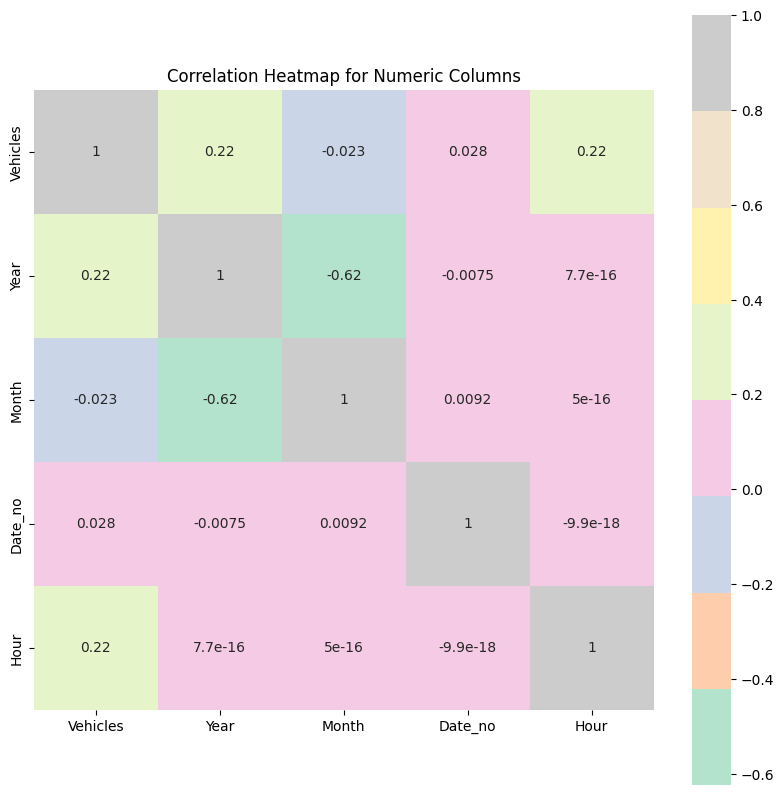

In [15]:
numeric_df = df[['Vehicles', 'Year', 'Month', 'Date_no', 'Hour']]

# Calculate the correlation matrix
corrmat = numeric_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, cmap="Pastel2", annot=True, square=True)
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

### Pairplot of Numeric Columns with Hue by Junction

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



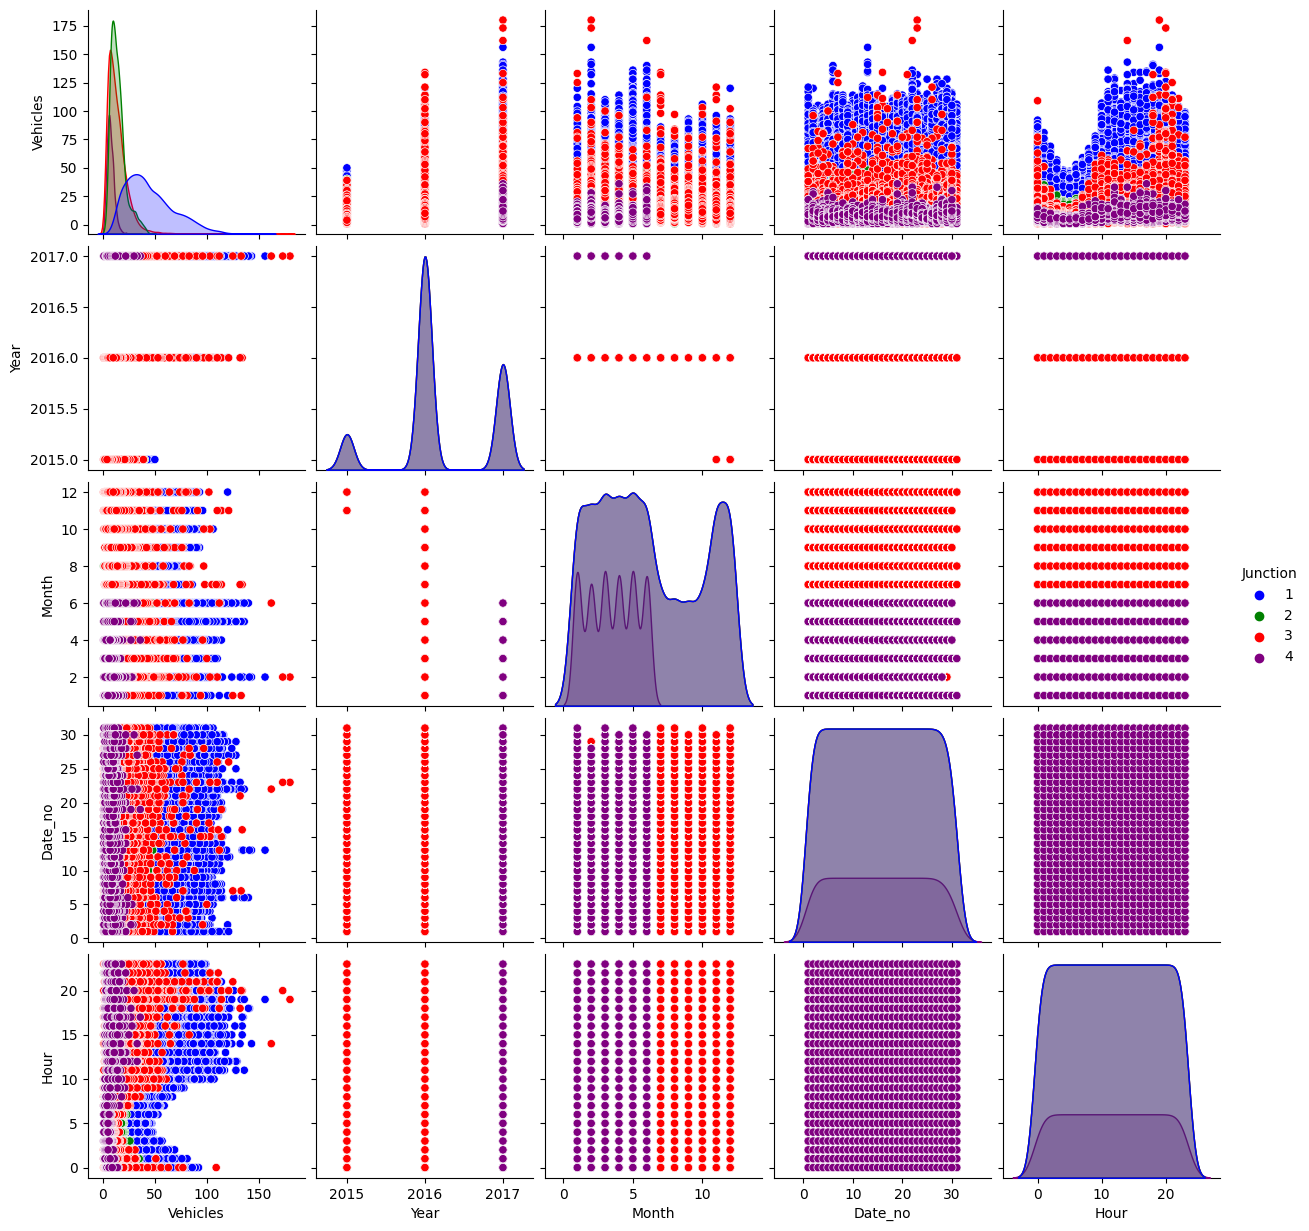

In [16]:
colors = ["blue", "green", "red", "purple"]
columns_to_include = ['Vehicles', 'Year', 'Month', 'Date_no', 'Hour']
sns.pairplot(data=df, hue="Junction", palette=colors, vars=columns_to_include)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [18]:
features = ['Junction', 'Year', 'Month', 'Date_no', 'Hour', 'Day']
target = 'Vehicles'

X = df[features]
y = df[target]
X = pd.get_dummies(X, columns=['Day'], drop_first=True)  # One-hot encode 'Day' and drop the first category


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

In [21]:
model = RandomForestRegressor(random_state=42)


In [22]:
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')


In [23]:
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)


In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 12.881309807656784
Mean Absolute Error: 2.417349334995844
R-squared: 0.9683930493882986


C:\Users\HP\AppData\Local\Temp\ipykernel_18000\1064113327.py:14: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



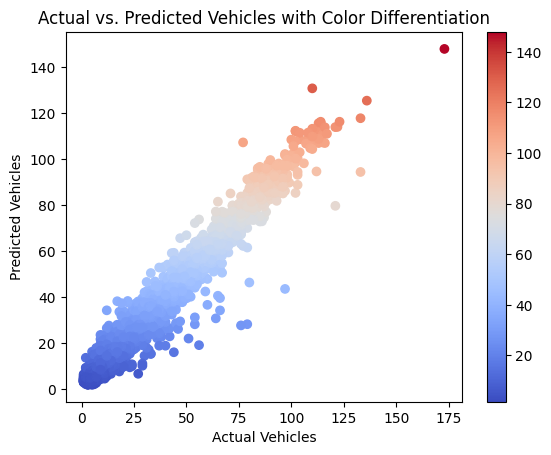

In [26]:
cmap = plt.get_cmap("coolwarm")  # You can choose any colormap you prefer
normalize = plt.Normalize(vmin=y_pred.min(), vmax=y_pred.max())
colors = cmap(normalize(y_pred))

# Create the scatter plot with colored points
plt.scatter(y_test, y_pred, c=colors)
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.title("Actual vs. Predicted Vehicles with Color Differentiation")

# Create a colorbar for the colormap
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])  # Dummy array for the colorbar
cbar = plt.colorbar(sm)

plt.show()

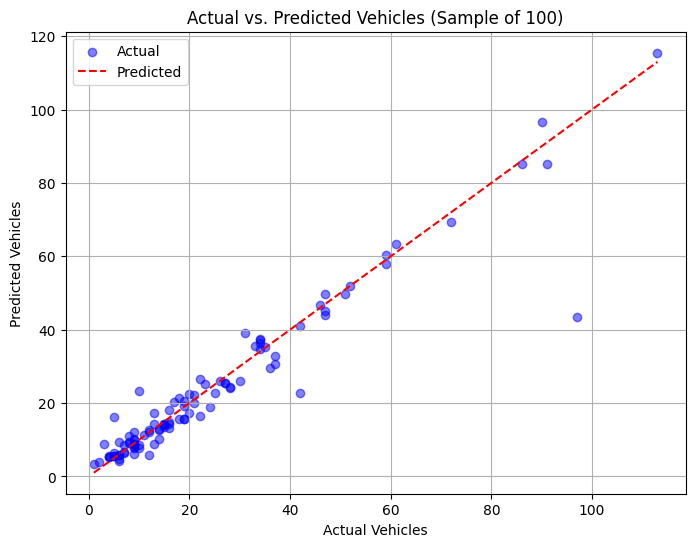

In [27]:
sample_size = 100
y_test_sample = y_test[:sample_size]
y_pred_sample = y_pred[:sample_size]

# Create a scatter plot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_sample, y_pred_sample, color='blue', label='Actual', alpha=0.5)
plt.plot([min(y_test_sample), max(y_test_sample)], [min(y_test_sample), max(y_test_sample)], color='red', linestyle='--', label='Predicted')
plt.xlabel("Actual Vehicles")
plt.ylabel("Predicted Vehicles")
plt.title("Actual vs. Predicted Vehicles (Sample of 100)")
plt.legend()
plt.grid(True)
plt.show()